# Аналитика в авиакомпании

## Описание проекта

### Шаг 4. Аналитика средствами Python   

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.  

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:  
model — модели самолета  
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:  
city — городах  
average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года  

### Для этих двух наборов данных нужно:  
  * импортировать файлы;  
  * изучить данные в них;  
  * проверить типы данных на корректность;  
  * выбрать топ-10 городов по количеству рейсов;  
  * построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;  
  * сделать выводы по каждому из графиков, пояснить результат.    

### Описание данных - База данных об авиаперевозках:  

**Таблица airports — информация об аэропортах:**  
airport_code — трёхбуквенный код аэропорта  
airport_name — название аэропорта  
city — город  
timezone — временная зона  
Таблица aircrafts — информация об самолётах:  
aircraft_code — код модели самолёта  
model — модель самолёта  
range — количество самолётов  

**Таблица tickets — информация о билетах:**  
ticket_no — уникальный номер билета  
passenger_id — персональный идентификатор пассажира  
passenger_name — имя и фамилия пассажира  

**Таблица flights — информация о рейсах:**  
flight_id — уникальный идентификатор рейса  
departure_airport — аэропорт вылета  
departure_time — дата и время вылета  
arrival_airport — аэропорт прилёта  
arrival_time — дата и время прилёта  
aircraft_code – id самолёта  

**Таблица ticket_flights — стыковая таблица «рейсы-билеты»**  
ticket_no — номер билета  
flight_id — идентификатор рейса  

**Таблица festivals — информация о фестивалях**  
festival_id — уникальный номер фестиваля  
festival_date — дата проведения фестиваля  
festival_city — город проведения фестиваля  
festival_name — название фестиваля  

**======================================================================**

## СОДЕРЖАНИЕ <a id="soder"></a>

[1. Импортируем файлы](#shag1)  
[2. Изучаем данные и проверяем типы данных на корректность](#shag2)  
[3. Выбраем топ-10 городов по количеству рейсов](#shag3)  
[4. Строим графики. Выводы](#shag4)   

**======================================================================**

## 1. Импортируем файлы <a id="shag1"></a>  
[К содержанию](#soder)

### **Ссылка на Файлы всех проектов - Описание, НоутБуки+Датасеты и др. на Google-диске**

https://drive.google.com/drive/folders/1JCBOKeIEPSfMKowXS8qAgz_T9D4difg4?usp=sharing

In [1]:
from pymystem3 import Mystem
m = Mystem()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plain = pd.read_csv('/datasets/query_1.csv')
city = pd.read_csv('/datasets/query_3.csv')

## 2. Изучаем данные <a id="shag2"></a>  
[К содержанию](#soder)

### Таблица `plain` -  самолеты

In [2]:
display(plain)
print(plain.info())
print(plain.describe())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000


***С таблицей все в порядке: данные полные, типы правильные, дубликатов нет, значения адекватные***

### Таблица `city` -  города

In [3]:
display(city.sort_values(by='average_flights', ascending=False))
print(city.info())
print(city.describe())

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194


***Данные полные и типы правильные,значения адекватные. Проверим только есть ли дубликаты в столбце `city`***

In [4]:
# Функция получает строку - лемматизирует её и делает все буквы маленькими, затем собирает и возвращает результат(удаляя /n)
def lemm_list(st):
    w = m.lemmatize(st.lower())
    w.pop()
    return ''.join(w)

city['lemm_city'] = city['city'].apply(lemm_list)
city

,city,average_flights,lemm_city
0,Абакан,3.870968,абакан
1,Анадырь,1.000000,анадырь
2,Анапа,2.161290,анапа
3,Архангельск,5.354839,архангельск
4,Астрахань,2.451613,астрахань
...,...,...,...
96,Чита,1.580645,чита
97,Элиста,4.870968,элиста
98,Южно-Сахалинск,4.290323,южно-сахалинск
99,Якутск,2.741935,якутск


*А теперь посчитаем количество строк ".value_counts()" в обоих столбцах `city` и `lemm_city`, если кол-во совпадёт, то повторов нет*

In [5]:
print(len(city['city'].value_counts() ), len(city['lemm_city'].value_counts()))

101 101


***С таблицей всё в порядке***

<font color='grey'>  
    
#### ***ВЫВОД: В результате предобработки обоих таблиц выявлено, что в обеих таблицах данные полные - пропусков нет. Все числовые типы адекватные и не выходят за рамки, типы менять не надо. В строковых типах проверены неочевидные совпадения/дубликаты - дубликаты отсутствуют, также менять типы не требуется. Общих дубликатов не обгаружено. Данные целостные, корректные и готовы к анализу.***  
    
</font>

## 3. Выбраем топ-10 городов по количеству рейсов] <a id="shag3"></a>  
[К содержанию](#soder)

In [6]:
city10 = city[['city','average_flights']].round(2).sort_values(by='average_flights', ascending=False).head(10)
city10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


## 4. Строим графики. Выводы <a id="shag4"></a>  
[К содержанию](#soder)

(построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов)

### Модели самолетов и количество рейсов

*(ТАБЛИЦА ИЗ ЗАДАЧИ: Найдите количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовите получившийся столбец flights_amount и выведите его, также выведите столбец model)*

In [7]:
plain = plain.sort_values('flights_amount')
plain

,model,flights_amount
4,Boeing 777-300,300
3,Boeing 767-300,600
0,Airbus A319-100,607
2,Boeing 737-300,630
1,Airbus A321-200,960
7,Sukhoi SuperJet-100,4185
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557


***Для графика больше всего подойдет гистограмма***

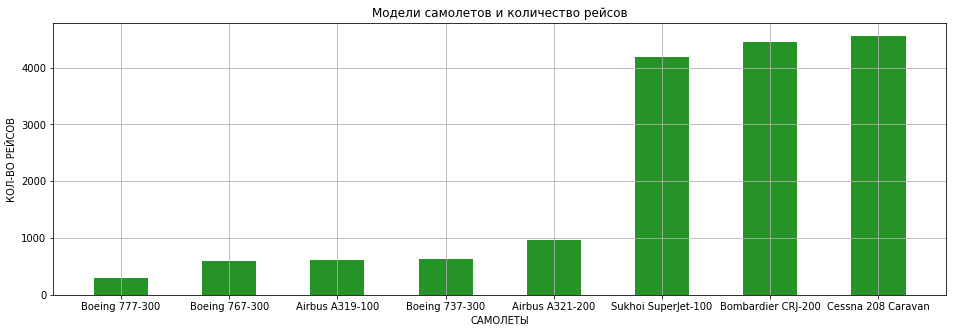

In [8]:
plt.figure(figsize=(16, 5))
plt.bar(plain['model'], plain['flights_amount'], color='g', alpha=0.85, width=0.5)
plt.xlabel('САМОЛЕТЫ')
plt.ylabel('КОЛ-ВО РЕЙСОВ')
plt.grid()
plt.title(f'Модели самолетов и количество рейсов')
#plt.legend()
plt.show();

***Хорошо видно, что больше всего использовались 3 модели самолетов: Sukhoi SuperJet-100, Bombardier CRJ-200, Cessna 208 Caravan; причем примерно одинаково от 4200-4500 полетов. А вот Boeing и Airbus в общем значительно меньше, примерно по 1500 вылетов (на брэнд). Сложно выявить по какой причине такая разница, возможно авиа-парк Boeing и Airbus значительно меньше, а возможно Boeing и Airbus - больше используются на внешних рейсах (за пределы России). Для вывод представленных данных не достаточно.***

### Города и количество рейсов

*(ТАБЛИЦА ИЗ ЗАДАЧИ: Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights, вместе с ним выведите столбец city)*

In [9]:
city = city.sort_values('average_flights', ascending=True)
city['average_flights'] = city['average_flights'].round(2)
city

,city,average_flights,lemm_city
8,Благовещенск,1.00,благовещенск
1,Анадырь,1.00,анадырь
31,Комсомольск-на-Амуре,1.00,комсомольск-на-амуре
76,Стрежевой,1.00,стрежевой
49,Нефтеюганск,1.00,нефтеюганск
...,...,...,...
20,Екатеринбург,11.32,екатеринбург
33,Красноярск,11.58,красноярск
54,Новосибирск,17.32,новосибирск
70,Санкт-Петербург,31.16,санкт-петербург


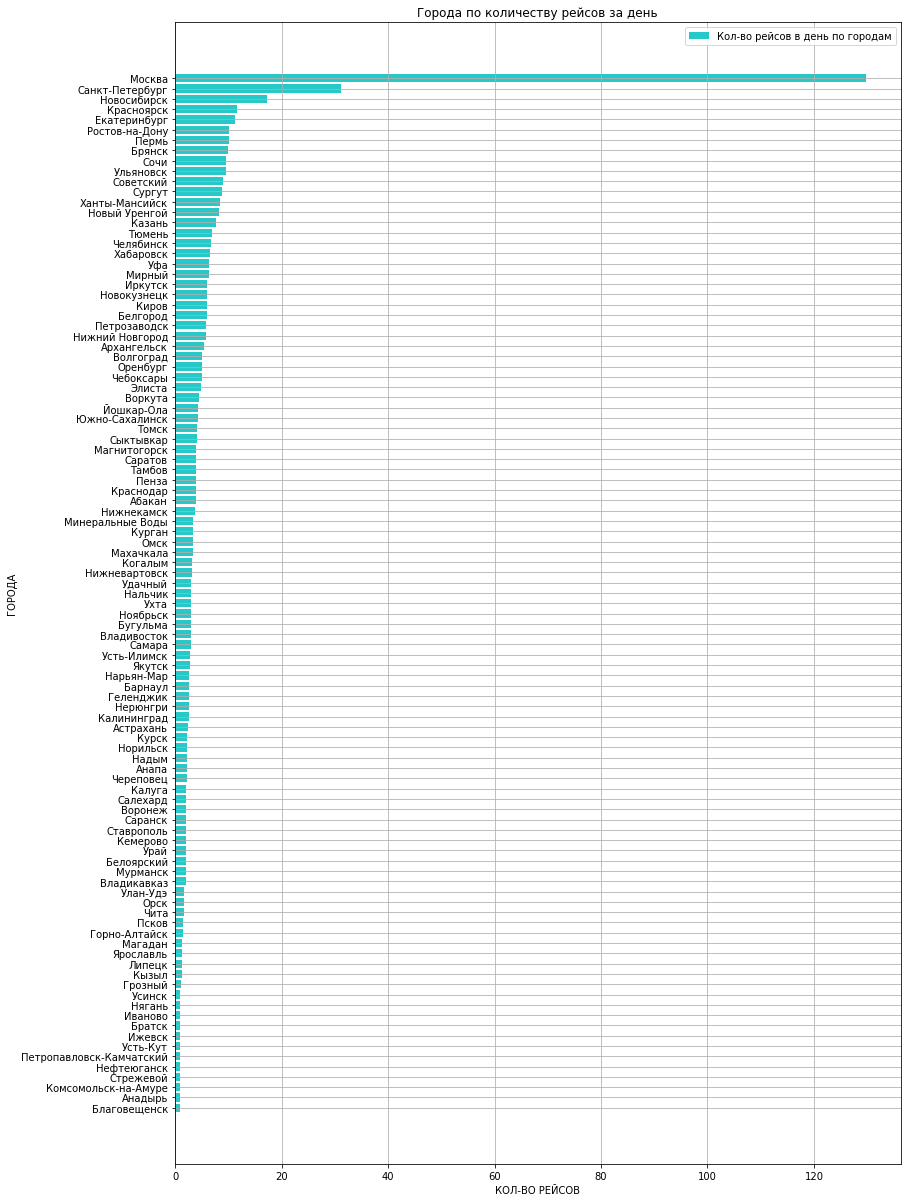

In [10]:
# plt.figure(figsize=(14, 20))
# plt.title('A Horizontal Bar Chart')
# plt.barh(city['city'], city['average_flights'], alpha=0.7,label='First')
# plt.legend(loc=5)
# plt.show()

plt.figure(figsize=(13, 21))
plt.barh(city['city'], city['average_flights'], label='Кол-во рейсов в день по городам', color='c', alpha=0.85)
plt.xlabel('КОЛ-ВО РЕЙСОВ')
plt.ylabel('ГОРОДА')
plt.grid()
plt.title(f'Города по количеству рейсов за день')
plt.legend()
plt.show();

<font color='grey'> 
***В большинстве случаев здесь прослеживается зависимость: чем больше город, тем больше в него (да и из него) летают, но есть и исключения (например население Нового Уренгоя не больше Казани). География городов имеет меньшее значение - люди хорошо летают и в Красноярск и во Владивосток, и в Новосибирск, и в Екатеринбург и в Сочи ...*** 
</font>

### Топ-10 городов и количество рейсов

In [11]:
city10

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


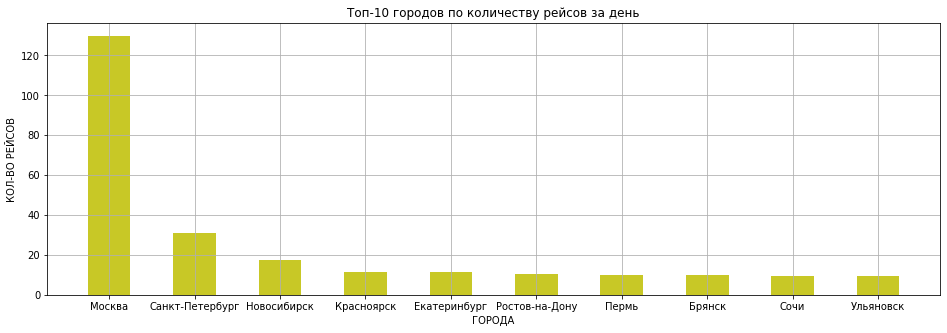

In [12]:
plt.figure(figsize=(16, 5))
plt.bar(city10['city'], city10['average_flights'], color='y', alpha=0.85, width=0.5)
plt.xlabel('ГОРОДА')
plt.ylabel('КОЛ-ВО РЕЙСОВ')
plt.grid()
plt.title(f'Топ-10 городов по количеству рейсов за день')
#plt.legend()
plt.show();

***Вывод по полётам за день:***
- На первом месте самый крупный город Москва - 130 полетов в день, к тому же это еще и столица - отрыв от 2 места в 4.5 раза!  
- На втором месте "Северная столица" Санкт-Петербург - 31, тоже много в 2-3 раза, чем остальные.  
- Далее идут Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск - с результатами 9,5-17,5.

<font color='grey'>      
ОБЩИЙ ВЫВОД:   
    Нам было предоставлено 2 файла с таблицами `plain - самолеты` и `city - города`, которые были проверены на этапе предобработка и в результате данные в них оказались в прекрасном состоянии - в таком виде будем анализировать. </font>   
<font color='grey'>    
    В ходе анализа было выяснено: </font>     
<font color='grey'>    
    1.Что больше всего летают 3 модели самолетов: Sukhoi SuperJet-100, Bombardier CRJ-200, Cessna 208 Caravan; причем примерно одинаково от 4200-4500 полетов. А вот Boeing и Airbus в общем значительно меньше, примерно по 1500 вылетов</font>  
 <font color='grey'>   
    2.Также выяснено, что в больших городах и рейсов в день как правило больше. На первом месте конечно же Москва (130 рейсов в день), на втором Санкт-Петербург (31), далее идут Новосибирск (17), Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск (9,5-11,5) и потом все остальные. География городов имеет меньшее значение - люди хорошо летают и в Красноярск и во Владивосток, и в Новосибирск, и в Екатеринбург и в Сочи ...